In [109]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from kedro.pipeline import *
from kedro.io import *
from kedro.runner import *

import pickle
import os

In [110]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df = pd.read_csv('../data/04_feature/hcl_lab_baseline_final.csv')

df

,Date,Age_class,Pos_test_Adenovirus,Pos_test_Influenza_(A+B),Pos_test_Metapneumovirus,Pos_test_ParaInfluenza_Virus_(PIV),Pos_test_Picornavirus_(rhinovirus+enterovirus),Pos_test_SARS-Cov-2,Pos_test_RSV,Nb_of_test_Adenovirus,...,ALERT_Nb_of_test_ParaInfluenza_Virus_(PIV),LOWER_CI_Nb_of_test_Picornavirus_(rhinovirus+enterovirus)_BASELINE,UPPER_CI_Nb_of_test_Picornavirus_(rhinovirus+enterovirus)_BASELINE,ALERT_Nb_of_test_Picornavirus_(rhinovirus+enterovirus),LOWER_CI_Nb_of_test_SARS-Cov-2_BASELINE,UPPER_CI_Nb_of_test_SARS-Cov-2_BASELINE,ALERT_Nb_of_test_SARS-Cov-2,LOWER_CI_Nb_of_test_RSV_BASELINE,UPPER_CI_Nb_of_test_RSV_BASELINE,ALERT_Nb_of_test_RSV
0,2023-09-24,< 1 year,0,0,0,0,13,13,0,43,...,0,1.274251,78.725749,0,6.545993,95.454007,0,6.695803,95.304197,0
1,2023-09-24,1 to 5,2,0,0,0,20,4,0,37,...,0,23.794429,44.205571,0,31.097952,54.902048,0,28.699041,57.300959,0
2,2023-09-24,6 to 11,0,0,0,0,13,2,0,21,...,0,4.980122,35.019878,0,12.797991,37.202009,0,11.656666,38.343334,0
3,2023-09-24,11 to 18,0,0,0,0,4,0,0,14,...,0,10.050462,15.949538,0,21.022844,28.977156,0,22.576125,27.423875,0
4,2023-09-24,18 to 40,0,2,0,0,3,27,0,10,...,0,7.109826,20.890174,0,82.375790,195.624210,0,96.181939,181.818061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2024-01-28,6 to 11,0,10,0,0,4,0,0,48,...,0,24.480122,54.519878,0,27.297991,51.702009,0,26.156666,52.843334,0
115,2024-01-28,11 to 18,0,5,0,0,3,0,0,20,...,0,14.050462,19.949538,1,21.022844,28.977156,0,20.576125,25.423875,0
116,2024-01-28,18 to 40,0,69,0,0,0,16,3,25,...,0,17.609826,31.390174,0,149.875790,263.124210,0,63.681939,149.318061,0
117,2024-01-28,40 to 65,0,83,0,0,2,14,2,44,...,0,33.301505,59.698495,0,233.853754,426.146246,0,135.156302,257.843698,0


In [111]:
import pandas as pd

# # Supposons que 'df' est votre DataFrame et 'Date' est la colonne de dates
# # Assurez-vous que la colonne 'Date' est au format datetime

# # Convertissez la colonne 'Date' en format datetime si ce n'est pas déjà fait
# df['Date'] = pd.to_datetime(df['Date'])

# # Filtrer les dates égales ou antérieures au 7 janvier 2024
# filtered_df = df[df['Date'] <= '2024-01-14']

# # Si vous voulez trier les données filtrées par ordre décroissant en fonction de la colonne 'Date'
# filtered_df_sorted = filtered_df.sort_values(by='Date', ascending=False)

# # Sélectionnez la première ligne du DataFrame trié (celle avec la date la plus récente parmi les dates filtrées)
# latest_date_row = filtered_df_sorted.iloc[0]

# filtered_df = filtered_df_sorted[filtered_df_sorted['Date'] == latest_date_row['Date']]

# # Convertissez la colonne 'Date' en format datetime si ce n'est pas déjà fait
df['Date'] = pd.to_datetime(df['Date'])

# # Filtrer les dates égales ou antérieures au 7 janvier 2024
filtered_df = df[df['Date'] <= '2024-01-14']
# Vous pouvez également utiliser directement le filtrage sans trier si la date la plus récente est votre seule préoccupation
# latest_date_row = filtered_df.max(numeric_only=False)

# Utilisez latest_date_row comme nécessaire


In [112]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Utilisez la méthode filter pour sélectionner les colonnes
selected_columns = df.filter(regex=r'^Pos_test(?!_BASELINE$)')

# Filtrer à nouveau pour exclure les colonnes se terminant par "_BASELINE"
selected_columns = selected_columns.filter(regex=r'^(?!.*_BASELINE$)')


selected_columns.columns



Index(['Pos_test_Adenovirus', 'Pos_test_Influenza_(A+B)',
       'Pos_test_Metapneumovirus', 'Pos_test_ParaInfluenza_Virus_(PIV)',
       'Pos_test_Picornavirus_(rhinovirus+enterovirus)', 'Pos_test_SARS-Cov-2',
       'Pos_test_RSV'],
      dtype='object')

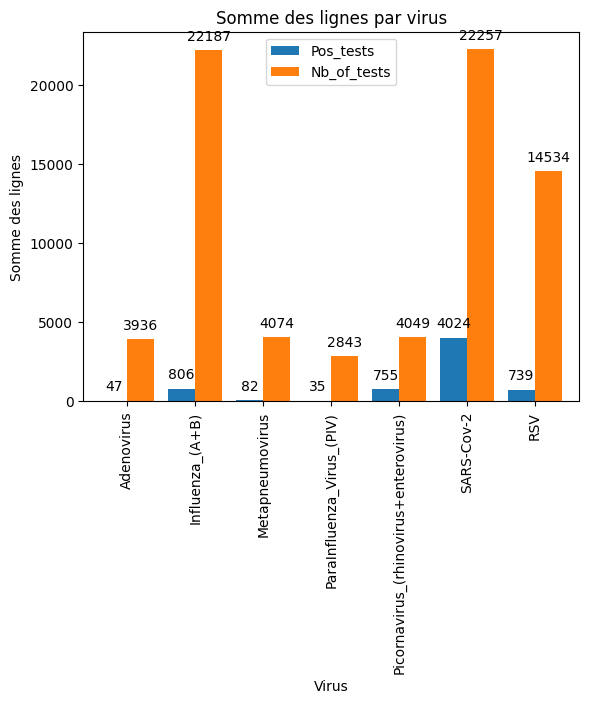

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df
# Sélectionnez les colonnes des tests
pos_tests_columns = ['Pos_test_Adenovirus', 'Pos_test_Influenza_(A+B)',
                     'Pos_test_Metapneumovirus', 'Pos_test_ParaInfluenza_Virus_(PIV)',
                     'Pos_test_Picornavirus_(rhinovirus+enterovirus)',
                     'Pos_test_SARS-Cov-2', 'Pos_test_RSV']

nb_of_tests_columns = ['Nb_of_test_Adenovirus', 'Nb_of_test_Influenza_(A+B)',
                       'Nb_of_test_Metapneumovirus', 'Nb_of_test_ParaInfluenza_Virus_(PIV)',
                       'Nb_of_test_Picornavirus_(rhinovirus+enterovirus)',
                       'Nb_of_test_SARS-Cov-2', 'Nb_of_test_RSV']

# Créez un DataFrame avec les noms de virus et les résultats des Pos_tests et Nb_of_tests
virus_names = [col.replace('Pos_test_', '').replace('Nb_of_test_', '') for col in pos_tests_columns]
data = {'Virus': virus_names,
        'Pos_tests': df[pos_tests_columns].sum().values,
        'Nb_of_tests': df[nb_of_tests_columns].sum().values}

sum_results = pd.DataFrame(data)

# Créez un barplot
ax = sum_results.plot(x='Virus', kind='bar', width=0.8, rot=0, ylabel='Somme des lignes',
                      title='Somme des lignes par virus')

# Ajoutez les annotations au-dessus des barres
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajoutez la légende
ax.legend(["Pos_tests", "Nb_of_tests"])
plt.xticks(rotation=90)

# Affichez le plot
plt.show()


In [114]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df2 = pd.read_csv('../data/04_feature/hcl_lab_fraction_final.csv')

In [115]:
# import pandas as pd

# # Supposons que 'df' est votre DataFrame et 'Date' est la colonne de dates
# # Assurez-vous que la colonne 'Date' est au format datetime

# # Convertissez la colonne 'Date' en format datetime si ce n'est pas déjà fait
# df2['Date'] = pd.to_datetime(df2['Date'])

# # Filtrer les dates égales ou antérieures au 7 janvier 2024
# filtered_df2 = df2[df2['Date'] <= '2024-01-14']

# # Si vous voulez trier les données filtrées par ordre décroissant en fonction de la colonne 'Date'
# filtered_df_sorted = filtered_df2.sort_values(by='Date', ascending=False)

# # Sélectionnez la première ligne du DataFrame trié (celle avec la date la plus récente parmi les dates filtrées)
# latest_date_row = filtered_df_sorted.iloc[0]

# filtered_df2 = filtered_df_sorted[filtered_df_sorted['Date'] == latest_date_row['Date']]

# filtered_df2

# # Vous pouvez également utiliser directement le filtrage sans trier si la date la plus récente est votre seule préoccupation
# # latest_date_row = filtered_df.max(numeric_only=False)

# # Utilisez latest_date_row comme nécessaire

# # Convertissez la colonne 'Date' en format datetime si ce n'est pas déjà fait
df2['Date'] = pd.to_datetime(df2['Date'])

# # Filtrer les dates égales ou antérieures au 7 janvier 2024
filtered_df2 = df2#[df2['Date'] <= '2024-01-14']

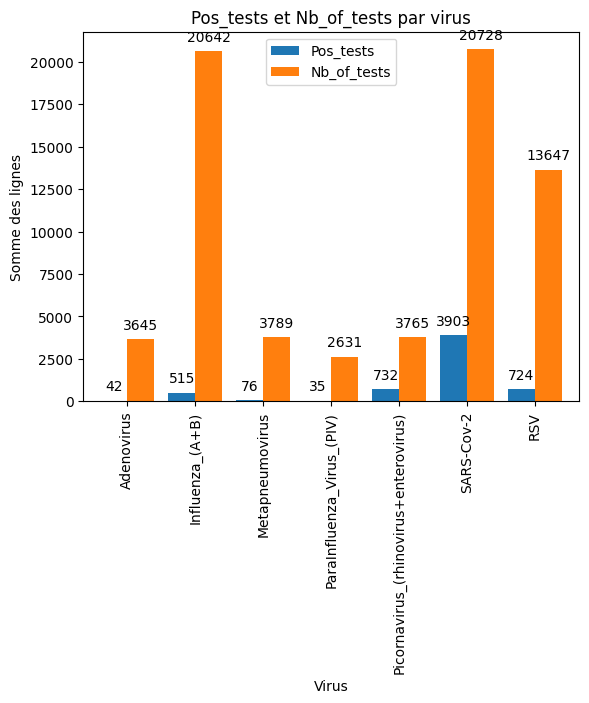

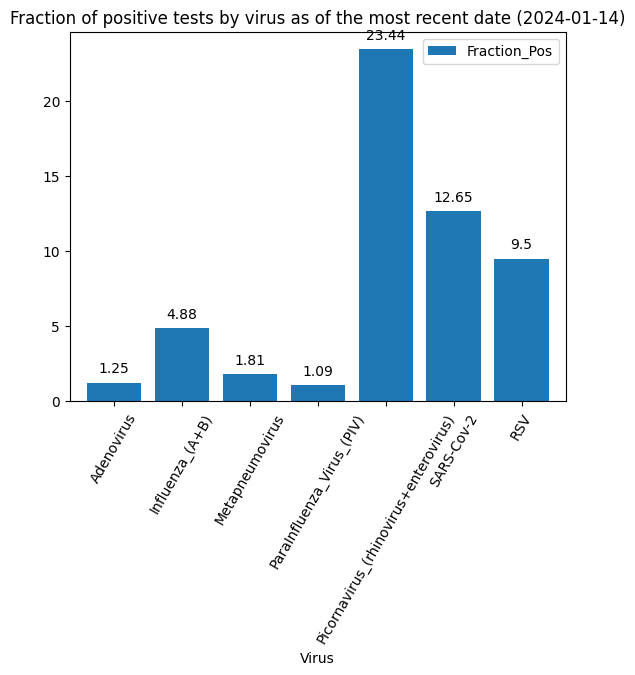

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vos DataFrames sont df et df2
# Sélectionnez les colonnes des tests dans df
pos_tests_columns = ['Pos_test_Adenovirus', 'Pos_test_Influenza_(A+B)',
                     'Pos_test_Metapneumovirus', 'Pos_test_ParaInfluenza_Virus_(PIV)',
                     'Pos_test_Picornavirus_(rhinovirus+enterovirus)',
                     'Pos_test_SARS-Cov-2', 'Pos_test_RSV']

nb_of_tests_columns = ['Nb_of_test_Adenovirus', 'Nb_of_test_Influenza_(A+B)',
                       'Nb_of_test_Metapneumovirus', 'Nb_of_test_ParaInfluenza_Virus_(PIV)',
                       'Nb_of_test_Picornavirus_(rhinovirus+enterovirus)',
                       'Nb_of_test_SARS-Cov-2', 'Nb_of_test_RSV']

# Créez un DataFrame avec les noms de virus et les résultats des Pos_tests et Nb_of_tests
virus_names = [col.replace('Pos_test_', '').replace('Nb_of_test_', '') for col in pos_tests_columns]
data = {'Virus': virus_names,
        'Pos_tests': filtered_df[pos_tests_columns].sum().values,
        'Nb_of_tests': filtered_df[nb_of_tests_columns].sum().values}

sum_results = pd.DataFrame(data)

# Créez un barplot pour Pos_tests et Nb_of_tests
ax1 = sum_results.plot(x='Virus', y=['Pos_tests', 'Nb_of_tests'], kind='bar', width=0.8, rot=0,
                       ylabel='Somme des lignes', title='Pos_tests et Nb_of_tests par virus')

# Ajoutez les annotations au-dessus des barres
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=90)

# Ajoutez la légende
ax1.legend(["Pos_tests", "Nb_of_tests"])

# Créez un DataFrame avec les noms de virus et les résultats des fractions positives
fraction_pos_columns = [f'Fraction_Pos_{virus}' for virus in virus_names]
data2 = {'Virus': virus_names,
         'Fraction_Pos': filtered_df2[fraction_pos_columns].sum().values}

fraction_pos_results = pd.DataFrame(data2)

# Arrondissez les valeurs de la colonne 'Fraction_Pos' à 2 chiffres après la virgule
fraction_pos_results['Fraction_Pos'] = fraction_pos_results['Fraction_Pos'].round(2)

# Créez un barplot pour Fraction_Pos
ax2 = fraction_pos_results.plot(x='Virus', y='Fraction_Pos', kind='bar', width=0.8, rot=0,
                                ylabel='', title='Fraction of positive tests by virus as of the most recent date (2024-01-14)')

# Ajoutez les annotations au-dessus des barres
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=60)

# Affichez les plots
plt.show()


In [44]:
# Load the paediatric data :AIOLOS19-12-2023
from scipy import stats
import numpy as np

# Load the data in xlsx file 

mean, sigma = np.mean(df_filtered["N_CASES"]), np.std(df_filtered["N_CASES"])

In [46]:
conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)
conf_int

(-2.1193192004769656, 39.858449635259575)

In [ ]:
conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)
conf_int

(-2.1193192004769656, 39.858449635259575)